[2025_12_05]_이진_다중 분류 모델_KNN

이진_다중 분류 모델_KNN
- 데이터 : iris.csv
- 3개 품종 중 1개 선택 => 예) Setosa 와 Others  : 2진분류 진행 
- 3개 품종 다중 분류 진행
- scale 전후 모델 성능 비교
- 최적 K 찾기

# 3개 품종 중 1개 선택 후 2진 분류 진행

In [267]:
# 모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

## ML 학습 알고리즘
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [268]:
DATA_FILE = '../DATA/iris.csv'

allDF = pd.read_csv(DATA_FILE)
print('꽃 종류       :',allDF.variety.unique())
print('columns 종류 :',allDF.columns)

꽃 종류       : ['Setosa' 'Versicolor' 'Virginica']
columns 종류 : Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')


In [269]:
allDF.info()
allDF.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [270]:
## Versicolor 선택
## versicolor = 1 / others = 0 으로 전처리

# 카테고리로 변경

allDF.variety = [ 1 if i == 'Versicolor' else 0 for i in allDF.variety ]

allDF.variety = allDF.variety.astype('category')
allDF.info()
allDF

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sepal.length  150 non-null    float64 
 1   sepal.width   150 non-null    float64 
 2   petal.length  150 non-null    float64 
 3   petal.width   150 non-null    float64 
 4   variety       150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [271]:
# 특징이랑 타겟 분류
featureDF = allDF[allDF.columns[:-1]]
targeSR = allDF[allDF.columns[-1]]

In [272]:
x_train, x_test, y_train, y_test = train_test_split(featureDF,
                                                    targeSR,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=targeSR)

In [273]:
# 모델 생성 및 학습 및 테스트
kModel = KNeighborsClassifier()
kModel.fit(x_train, y_train)
kModel.score(x_train, y_train)


0.9583333333333334

In [ ]:
# 모델 테스트
# -> versicolor = 1
# -> other = 0

Setosa = [[5.1, 3.5, 1.4, 0.2]]
print(kModel.predict(Setosa))

Versicolor = [[5.5,2.6,4.4,1.2]] ## 1 출력됨
print(kModel.predict(Versicolor))

Virginica = [[7.4,2.8,6.1,1.9]]
print(kModel.predict(Virginica))

[0]
[1]
[0]


c:\Users\qjadl\anaconda3\envs\ML_311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\qjadl\anaconda3\envs\ML_311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\qjadl\anaconda3\envs\ML_311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


# 3개 품종 다중 분류 진행


In [289]:
DATA_FILE = '../DATA/iris.csv'

allDF = pd.read_csv(DATA_FILE)
print('꽃 종류       :',allDF.variety.unique())
print('columns 종류 :',allDF.columns)

꽃 종류       : ['Setosa' 'Versicolor' 'Virginica']
columns 종류 : Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')


In [290]:
# 특징이랑 타겟 분류
featureDF = allDF[allDF.columns[:-1]]
targeSR = allDF[allDF.columns[-1]]

In [291]:
x_train, x_test, y_train, y_test = train_test_split(featureDF,
                                                    targeSR,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=targeSR)

In [292]:
# 모델 생성 및 학습 및 테스트
kModel = KNeighborsClassifier()
kModel.fit(x_train, y_train)
kModel.score(x_train, y_train)


0.9666666666666667

In [293]:
# 모델 테스트
# -> versicolor = 1
# -> other = 0

Setosa = [[5.1, 3.5, 1.4, 0.2]]
print(kModel.predict(Setosa))

Versicolor = [[5.5,2.6,4.4,1.2]] ## 1 출력됨
print(kModel.predict(Versicolor))

Virginica = [[7.4,2.8,6.1,1.9]]
print(kModel.predict(Virginica))

['Setosa']
['Versicolor']
['Virginica']


c:\Users\qjadl\anaconda3\envs\ML_311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\qjadl\anaconda3\envs\ML_311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\qjadl\anaconda3\envs\ML_311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


# Scale 전 후 모델 성능 비교

In [312]:
# 모델 학습 및 성능 평가
# 모델 생성
kModel_b = KNeighborsClassifier()

# 모델 학습
kModel_b.fit(x_train, y_train)

# 모델 성능 평가
print(f' 학습 성능 : {kModel_b.score(x_train, y_train)} / 테스트 성능 {kModel_b.score(x_test, y_test)}')




 학습 성능 : 0.9666666666666667 / 테스트 성능 1.0


In [ ]:
# 스케일링
stdScaler = StandardScaler()

# 스케일링 학습
stdScaler.fit(x_train)

# 스케일링 변환
s_x_train = stdScaler.transform(x_train)
s_x_test = stdScaler.transform(x_test)

In [317]:
# 모델 학습 및 성능 평가
# 모델 생성
kModel_a = KNeighborsClassifier()

# 모델 학습
kModel_a.fit(s_x_train, y_train)

# 모델 성능 평가
print(f' 학습 성능 : {kModel_a.score(s_x_train, y_train)} / 테스트 성능 {kModel_a.score(s_x_test, y_test)}')



 학습 성능 : 0.975 / 테스트 성능 0.9333333333333333


# 최적의 K 찾기 

[1] 파일 및 모듈 로딩 <hr>

In [ ]:
# 모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

## ML모델 / 전처리 모듈
from sklearn.preprocessing import StandardScaler, RobustScaler      ## 전처리
from sklearn.model_selection import train_test_split                ## 데이터셋 분리
from sklearn.neighbors import KNeighborsClassifier                  ## 알고리즘



In [ ]:
irisDF = pd.read_csv('../DATA/iris.csv')
irisDF.info()
irisDF.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


[2] 데이터 전처리  <hr>

In [ ]:
## variety : object => category
pd.options.mode.copy_on_write = True

irisDF.variety = irisDF.variety.astype('category')
irisDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sepal.length  150 non-null    float64 
 1   sepal.width   150 non-null    float64 
 2   petal.length  150 non-null    float64 
 3   petal.width   150 non-null    float64 
 4   variety       150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [ ]:
irisDF

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


[3] 학습관련 전처리 및 준비 <hr>
- 피쳐와 타겟 분리
- 학습용과 테스트용 데이터셋 분리
- 1개의 Data 파일 경우 학습용 스케일러 생성 및 학습용/테스트용 적용

In [ ]:
# 피쳐와 타겟 분리
featureDF = irisDF[irisDF.columns[:-1]]
targeSR   = irisDF[irisDF.columns[-1]]

print(f'featureDF => {featureDF.shape} / {featureDF.ndim}D')
print(f'targeSR => {targeSR.shape} / {targeSR.ndim}D')

featureDF => (150, 4) / 2D
targeSR => (150,) / 1D


In [ ]:
# 학습용과 테스트용 데이터셋 분리
## x는 입력 => y는 출력 / train은 학습용 , test는 시험용
x_train, x_test, y_train, y_test = train_test_split(featureDF,
                                                    targeSR,
                                                    test_size=0.2,
                                                    random_state=42, ## 국룰임. -> 섞는걸 고정시키는거임
                                                    stratify=targeSR)

In [ ]:
## 수치형 피쳐들 스케일 조정 : 스케일러 생성 ★학습용으로 데이터셋으로 생성
stdScaler = StandardScaler()
stdScaler.fit(x_train)
print("모델 파라미터 :", stdScaler.mean_, stdScaler.var_, stdScaler.scale_)

## => 학습용/테스트용 데이터셋 스케일링 진행 => ★ndarray 타입
s_x_train = stdScaler.transform(x_train)
s_x_test = stdScaler.transform(x_test)

모델 파라미터 : [5.84166667 3.04833333 3.77       1.205     ] [0.70126389 0.19949722 3.1016     0.57680833] [0.837415   0.44665112 1.761136   0.75947899]


[4] 학습 진행 => 기준성능 설정 : 학습 모델 기본값 그대로 학습 <hr>

In [ ]:
## 최적의 K값 찾기
best_t = []
best_s = []

for k in range(1,int((s_x_train.shape[0])**(1/2))+1):
    # 모델 생성
    kModel = KNeighborsClassifier(n_neighbors=k)

    # 모델 학습
    kModel.fit(s_x_train, y_train) ## 학습은 학습용으로 하고

    # 성능 테스트 -> 테스트용
    score_t = kModel.score(s_x_test, y_test) ## 테스트는 테스트용으로 해야함. 학습용으로하면 작은값이 항상 높음 -> 문제가 똑같으니깐.
    best_t.append(score_t)
    # 성능 테스트 -> 공부용
    score_s = kModel.score(s_x_train, y_train) 
    best_s.append(score_s)

    # 출력
    print('점수 : ',score_t)
    print('점수 : ',score_s)
    print()
    
df = pd.DataFrame({'테스트용 테스트' :best_t, '공부용 테스트':best_s})
df['차이'] = abs(df['테스트용 테스트'] - df['공부용 테스트'])
df1 = df.sort_values(by=['차이','테스트용 테스트','공부용 테스트'], ascending=[True, False, False]).copy()
display(df)
BEST_K = df1.index[0] + 1
BEST_K

점수 :  0.9666666666666667
점수 :  1.0

점수 :  0.9333333333333333
점수 :  0.9666666666666667

점수 :  0.9333333333333333
점수 :  0.9583333333333334

점수 :  0.9333333333333333
점수 :  0.9583333333333334

점수 :  0.9333333333333333
점수 :  0.975

점수 :  0.9333333333333333
점수 :  0.9583333333333334

점수 :  0.9666666666666667
점수 :  0.975

점수 :  0.9333333333333333
점수 :  0.9583333333333334

점수 :  0.9666666666666667
점수 :  0.9583333333333334

점수 :  0.9666666666666667
점수 :  0.9583333333333334



,테스트용 테스트,공부용 테스트,차이
0,0.966667,1.000000,0.033333
1,0.933333,0.966667,0.033333
2,0.933333,0.958333,0.025000
3,0.933333,0.958333,0.025000
4,0.933333,0.975000,0.041667
5,0.933333,0.958333,0.025000
6,0.966667,0.975000,0.008333
7,0.933333,0.958333,0.025000
8,0.966667,0.958333,0.008333
9,0.966667,0.958333,0.008333


np.int64(7)

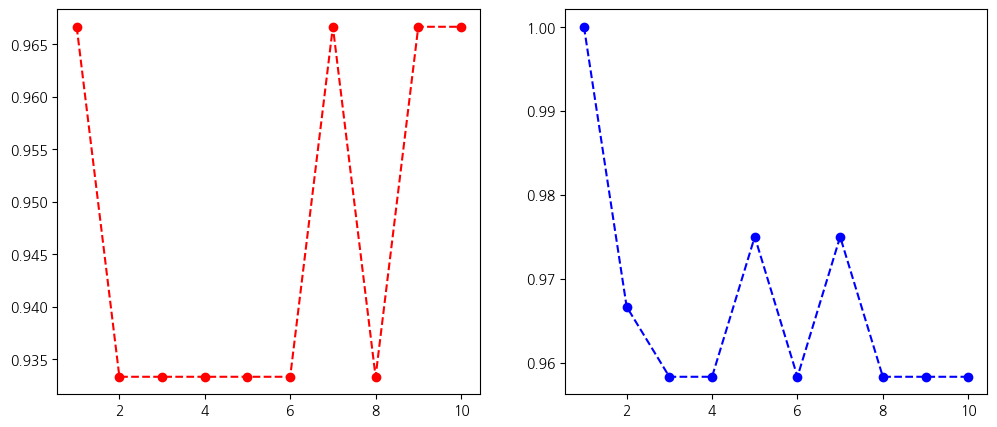

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(12,5))
df1 = df.reset_index().copy()
x = range(1, len(df1) + 1)   # 1부터 시작하는 x축

axes[0].plot(x, df1['테스트용 테스트'], 'ro--')
axes[1].plot(x, df1['공부용 테스트'], 'bo--')
plt.show()

In [ ]:
## best k 값으로 모델 인스턴스 생성
print(BEST_K)
kModel = KNeighborsClassifier(n_neighbors=BEST_K)
kModel

7


,n_neighbors,np.int64(7)
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [ ]:
## best k 값 모델로 학습
kModel.fit(s_x_train, y_train)

,n_neighbors,np.int64(7)
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


[5] 성능평가 : 테스트용 데이터셋 진행 <hr>
- 학습용, 테스트용 성능 비교

In [ ]:
## .score(2D_피쳐, 1D_타켓)
train_score = kModel.score(s_x_train, y_train)
test_score = kModel.score(s_x_test, y_test)

print(f'[성능비교]\n학습 점수 : {train_score} *테스트 점수 : {test_score}')

[성능비교]
학습 점수 : 0.975 *테스트 점수 : 0.9666666666666667


[6] 일반적인 데이터 예측 <hr>


In [ ]:
in_data = input('(꽃의 4가지 요소 입력 ex] 5 3 1 2)').strip().split()
in_data = list(map(float, in_data))
print(f'new_data : {in_data}', end=' ')

## DF 형식으로 저장
new_data = pd.DataFrame([in_data], columns=irisDF.columns[:-1])

## 스케일링 징행
s_new_data = stdScaler.transform(new_data)
print(f'=> s_new_data : {s_new_data}')

new_data : [] 

ValueError: 4 columns passed, passed data had 0 columns

In [ ]:
## 예측 진행
pre_target = kModel.predict(s_new_data)
print(f'꽃의 종류는 {pre_target.item()}입니다.')

꽃의 종류는 Virginica입니다.
